# Wine Quality Dataset - Decision Tree Classifier
# -----------------------------------------------
## The Wine Quality dataset contains physicochemical properties of different red wines, along with a target variable
## representing the wine quality score (1-10). The goal is to predict the wine quality based on the given features.



# Features:
## 1. Fixed Acidity: Tartaric acid in g/dm³ (affects sourness).
## 2. Volatile Acidity: Acetic acid in g/dm³ (higher levels lead to unpleasant taste).
## 3. Citric Acid: Citric acid in g/dm³ (adds freshness and acts as a preservative).
## 4. Residual Sugar: Sugar left after fermentation in g/dm³ (affects sweetness).
## 5. Chlorides: Salt content in g/dm³ (affects wine taste and preservation).
## 6. Free Sulfur Dioxide: Unbound SO₂ in mg/dm³ (prevents spoilage).
## 7. Total Sulfur Dioxide: Total SO₂ in mg/dm³ (affects taste and shelf life).
## 8. Density: Density of wine in g/cm³ (related to alcohol and sugar).
## 9. pH: Acidity/alkalinity of wine (lower values indicate higher acidity).
## 10. Sulphates: Potassium sulphate in g/dm³ (acts as a preservative and antioxidant).
## 11. Alcohol: Alcohol content in % by volume.

# Target:
## - Quality: The wine quality score (1-10), with most wines rated between 3 and 8.

##Step 1: Import Libraries and Load the Dataset


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt




In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')


In [3]:
# Display the first few rows of the dataset
display(wine_data.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Separate features and target
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target: Wine quality score (1-10)

In [5]:
wine_data.shape

(1599, 12)

##Step 2: Split the Dataset into Training and Test Sets
 - We will use 80% of the data for training and 20% for testing.

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and test sets
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (1279, 11), Test set size: (320, 11)


##Step 3: Build the Initial Decision Tree Model (Without Hyperparameters)
 - We will first build a default decision tree and evaluate its performance.

In [7]:
# Build the initial Decision Tree classifier (without any hyperparameters)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)  # Fit the model

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Decision Tree Accuracy: {initial_accuracy:.2f}")


Initial Decision Tree Accuracy: 0.56


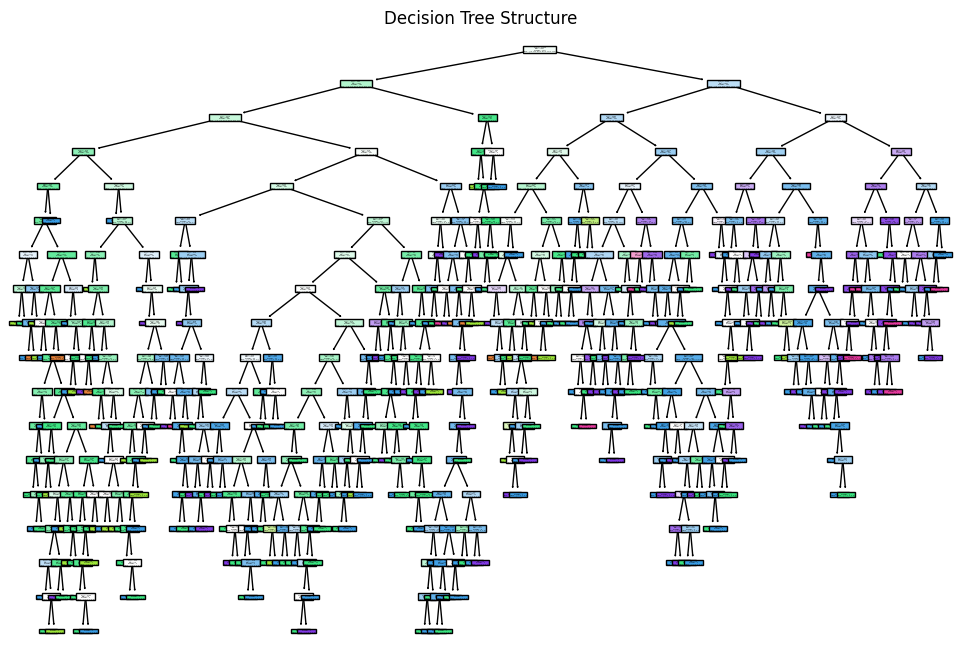

In [8]:
# Step 6: Plot the Decision Tree Structure
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True)
plt.title('Decision Tree Structure')
plt.show()

# Hyperparameter tuning using GridSearchCV


In [9]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [10]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [11]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [12]:
# Best parameters and model
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)


Best Parameters from Grid Search:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


## get the best model:
* grid_search.best_estimator_:

During the GridSearchCV process, multiple combinations of hyperparameters are tested using cross-validation.

* best_estimator_ stores the model instance that achieved the highest performance (based on the scoring metric you specified, e.g., 'accuracy').

* Assigning to tuned_model:

The tuned_model variable now holds this best-performing model with its optimal hyperparameters.

In [13]:
# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
y_tuned_pred = tuned_model.predict(X_test)

In [14]:
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_tuned_pred))
print("Tuned Accuracy:", accuracy_score(y_test, y_tuned_pred))


Classification Report for Tuned Model:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.73      0.68       130
           6       0.58      0.55      0.56       132
           7       0.48      0.48      0.48        42
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.29       320
weighted avg       0.56      0.58      0.57       320

Tuned Accuracy: 0.584375


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


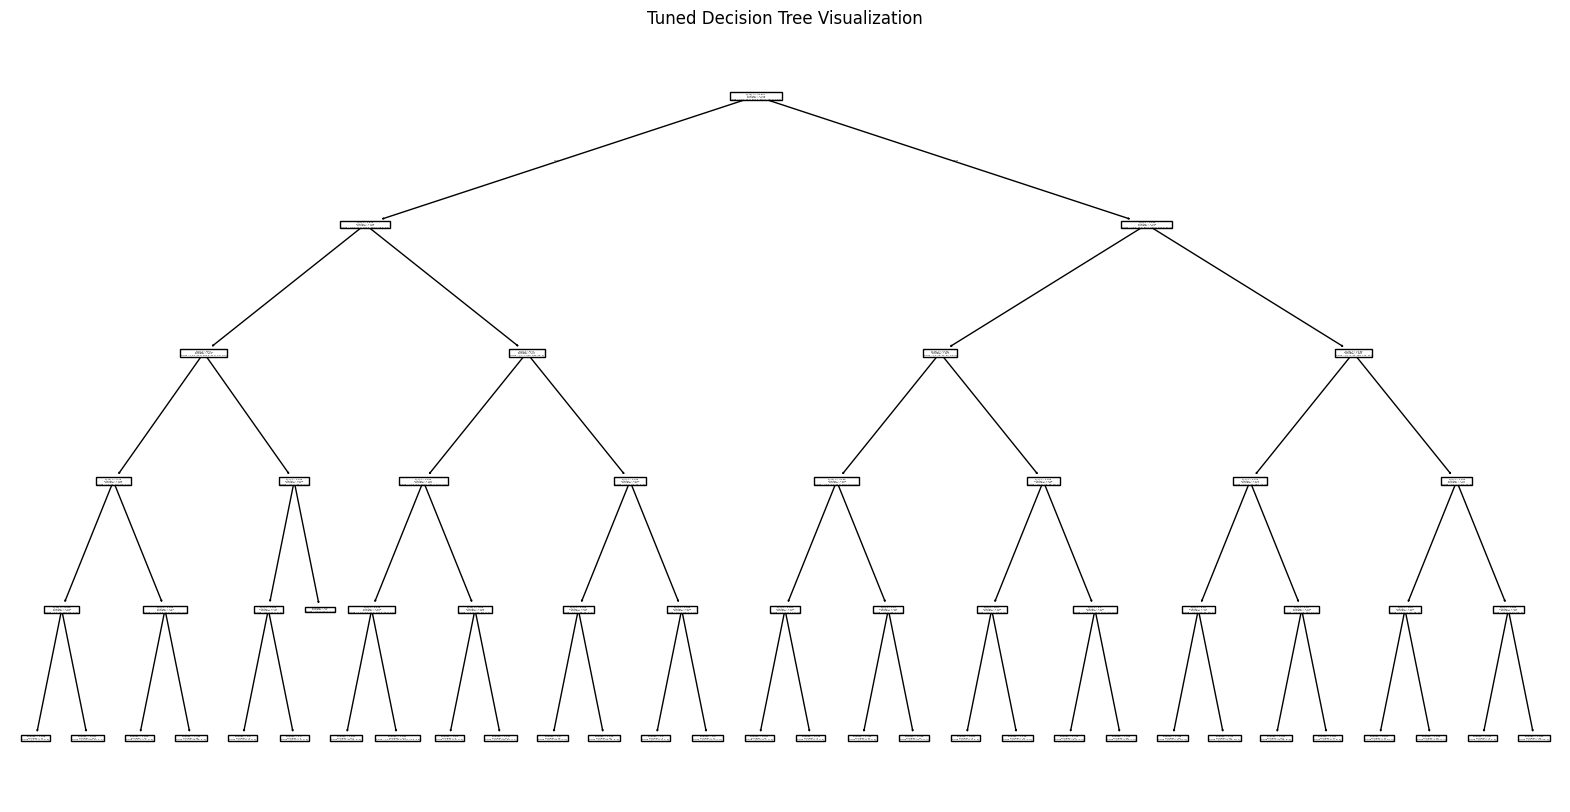

In [15]:
# Visualize the tuned decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tuned_model)
plt.title("Tuned Decision Tree Visualization")
plt.show()


SyntaxError: invalid syntax (<ipython-input-17-bf9779a50793>, line 2)

#Assignment:
 - Perfrom a gridsearch for all these params and compare accuracy:
* max_depth
* min_samples_split
* min_samples_leaf
* max_features
* max_leaf_nodes
* min_impurity_decrease
* Criterion
* ccp_alpha
